# Итоговая работа по курсу «Python и математика для анализа данных»

## Импортируем библиотеки

In [95]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 1. Загрузить файл hr.csv.

In [31]:
hr_data = pd.read_csv('analyze_data/HR.csv')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [77]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

### Рассчитываем основные статистики (кроме моды)

In [34]:
hr_data[0:0].append(hr_data.describe().loc[ ['mean', '50%', 'min', 'max', 'std'] , : ], sort=False) # 50% = median

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN


Показатели sales и salary являются качественными, можно найти только их моду.

### Рассчитываем моду

In [33]:
hr_data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


У показателя average_montly_hours две моды.

## 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

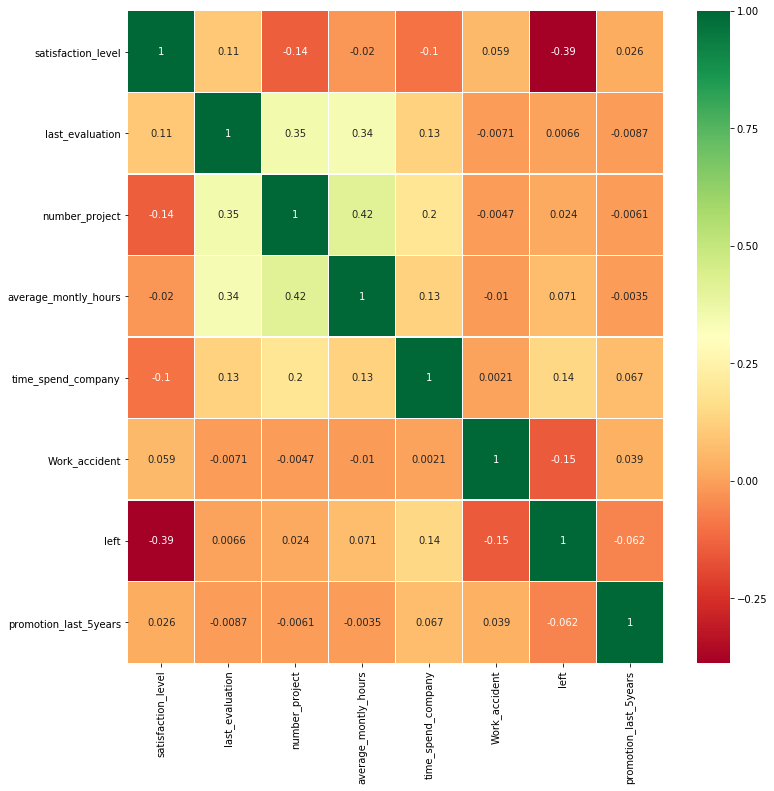

In [38]:
sns.heatmap(hr_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

## 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными 

In [103]:
stats.ttest_ind(hr_data['satisfaction_level'].sample(n=10, random_state=2),hr_data['number_project'].sample(n=10, random_state=2))

Ttest_indResult(statistic=-8.743690780333132, pvalue=6.75691483218423e-08)

## 6. Рассчитать, сколько работников работает в каждом департаменте

In [41]:
(
    hr_data.filter(items=['sales', 'salary'])
    .rename(columns={'sales':'department', 'salary':'units_count'})
    .groupby('department')
    .agg('count')
)

,units count
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


## 7. Показать распределение сотрудников по зарплатам 

In [63]:
hr_data_salary = (
    hr_data.filter(items=['salary', 'sales'])
    .rename(columns={'sales':'units_count', })
    .groupby('salary')
    .agg('count')
    .sort_values(by='units_count', ascending = False)
    .reset_index()
)

hr_data_salary

,salary,units_count
0,low,7316
1,medium,6446
2,high,1237


### Визуализация по количеству

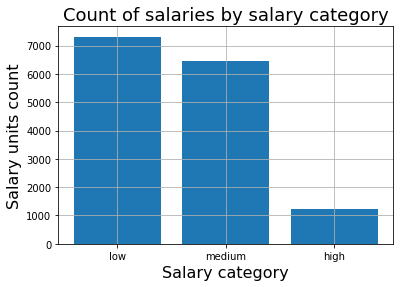

In [64]:
plt.bar(hr_data_salary['salary'],
         hr_data_salary['units_count'])
plt.grid()
plt.xlabel('Salary category', fontsize=16)
plt.ylabel('Salary units count', fontsize=16)
plt.title('Count of salaries by salary category', fontsize=18)
plt.show()

### Визуализация в процентном соотношении

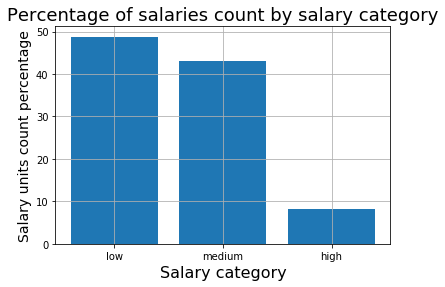

In [71]:
hr_data_salary_perc = hr_data_salary

hr_data_salary_perc['units_count_percentage'] = (
    hr_data_salary['units_count']
    .apply(lambda x: x / hr_data_salary['units_count'].sum() * 100)
)

plt.bar(hr_data_salary_perc['salary'],
         hr_data_salary_perc['units_count_percentage'])
plt.grid()
plt.xlabel('Salary category', fontsize=16)
plt.ylabel('Salary units count percentage', fontsize=14)
plt.title('Percentage of salaries count by salary category', fontsize=18)
plt.show()

## 8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [84]:
hr_data_salary_with_dept = (
    hr_data.filter(items=['sales','salary', 'left'])
    .rename(columns={'sales':'department', 'left':'count'})
    .groupby(['department', 'salary'])
    .agg('count')
)

hr_data_salary_with_dept

count
department  salary       
IT          high       83
            low       609
            medium    535
RandD       high       51
            low       364
            medium    372
accounting  high       74
            low       358
            medium    335
hr          high       45
            low       335
            medium    359
management  high      225
            low       180
            medium    225
marketing   high       80
            low       402
            medium    376
product_mng high       68
            low       451
            medium    383
sales       high      269
            low      2099
            medium   1772
support     high      141
            low      1146
            medium    942
technical   high      201
            low      1372
            medium   1147

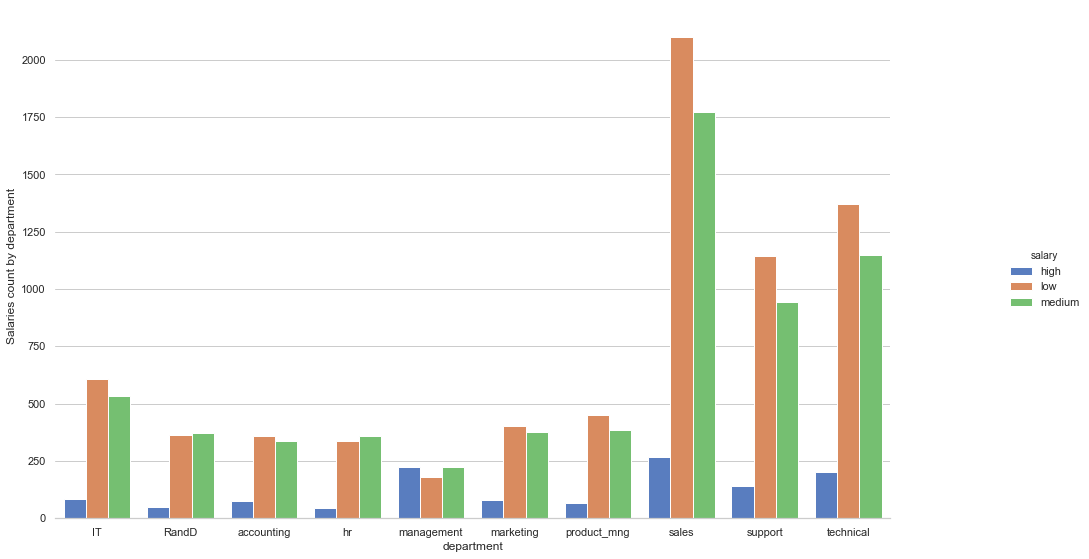

In [94]:
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="department", y="count", hue="salary", data=hr_data_salary_with_dept.reset_index(),
                height=6, kind="bar", palette="muted")
g.despine(left=True)
plt.gcf().set_size_inches(16.7, 8.27)
g.set_ylabels("Salaries count by department")

## 9. Сколько сотрудников покинули компанию

In [76]:
print('Компанию покинул ' + str(hr_data[hr_data['left'] == 1]['left'].count()) + ' сотрудник')

Компанию покинул 3571 сотрудник
